<a href="https://colab.research.google.com/github/pepezamarripa/datascience_certificate/blob/main/Solucion_Reto_SC_63_Jose_Zamarripa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerías
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Cargo del csv
df = pd.read_csv("bank_marketing.csv")

In [ ]:
#////////Código descriptivo\\\\\\\\\\\
#Obtengo la información sobre las columnas y tipos de datos
column_info = df.dtypes

#Imprimo el nombre de la columna y tipo de datos
for column_name, data_type in column_info.items():
  print(f"NombreVar: {column_name}, Tipo: {data_type}")

#Verifico si hay campos vacíos
campos_vacios = df.isnull().sum()

#Obtengo los campos vacíos por columna
print("Campos vacíos por columna:")
print(campos_vacios)

Debido a que las variables categóicas no tienen un orden lógico, vamos a usar "OneHotEncoder"


In [4]:
#Obtengo las columnas que tienen datos categóricos
columnas_categoricas = df.drop(columns=['y']).select_dtypes(include=['object']).columns

#Creo la instancia de OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

#Aplicar el OneHotEncoder a las columnas categóricas y crear un DataFrame con los datos obtenidos
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[columnas_categoricas]))

#Asigno nombres a las columnas del DataFrame basadas en los valores de las columnas originales
nombres_nuevas_columnas = onehot_encoder.get_feature_names_out(columnas_categoricas)
df_encoded.columns = nombres_nuevas_columnas

#Elimino las columnas categóricas del DataFrame original
df = df.drop(columns=columnas_categoricas)

#Concateno el nuevo DataFrame (creado con OneHotEncoder) y el DataFrame original
df = pd.concat([df, df_encoded], axis=1)

#Imprimo las primeras filas del DataFrame
print(df.head())

   age  balance  day  duration  campaign  pdays  previous    y  job_admin.  \
0   31     2666   10       318         2     97         6  yes         0.0   
1   29     1584    6       245         1     -1         0  yes         0.0   
2   41     2152   17       369         1     -1         0   no         0.0   
3   50       84   17        18         8     -1         0   no         0.0   
4   40        0   28       496         2    182        11  yes         1.0   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0              0.0  ...        0.0        0.0        0.0        1.0   
1              0.0  ...        0.0        0.0        0.0        0.0   
2              1.0  ...        0.0        0.0        0.0        1.0   
3              1.0  ...        0.0        0.0        0.0        0.0   
4              0.0  ...        0.0        0.0        0.0        0.0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0        0.0        0.0  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


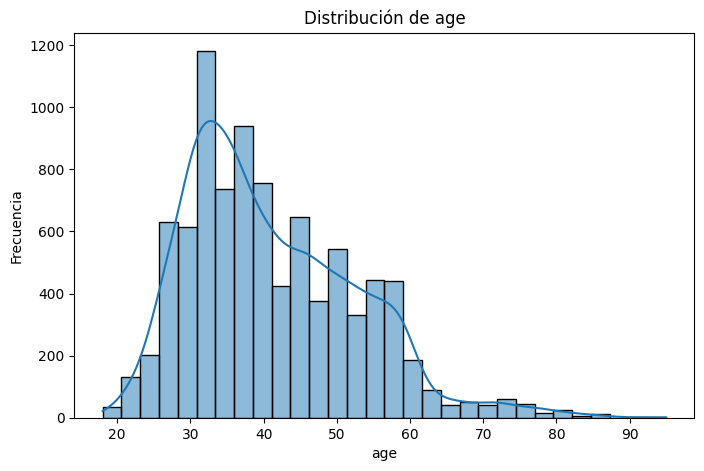

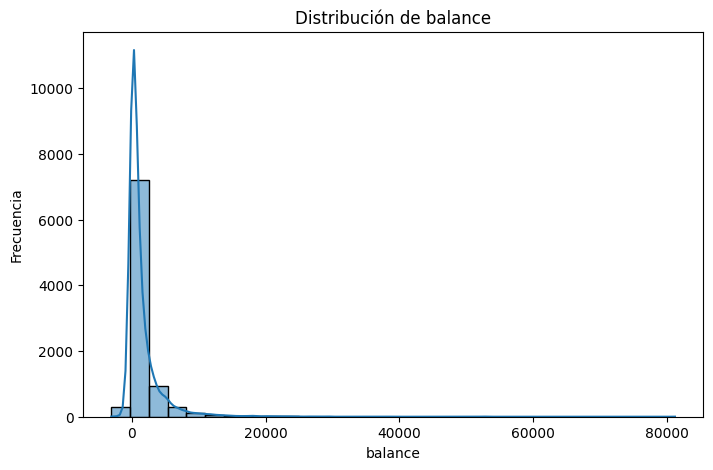

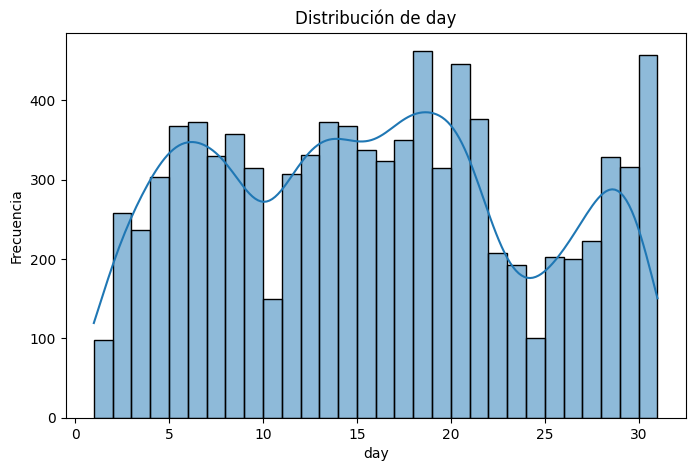

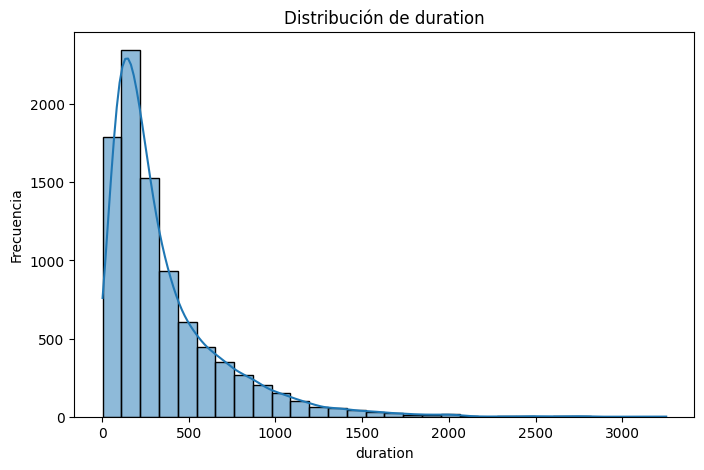

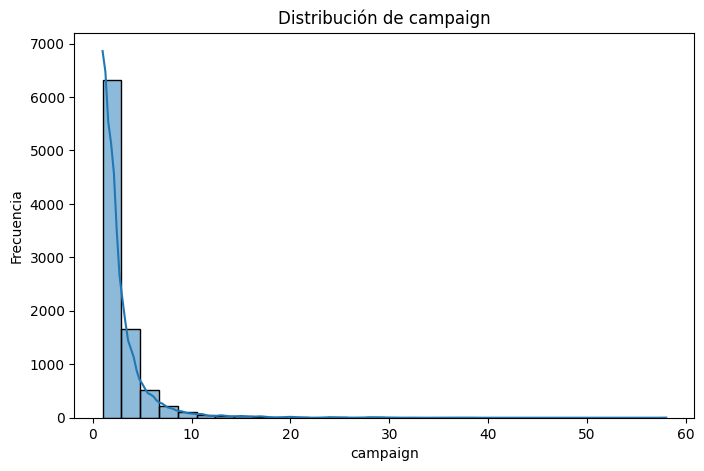

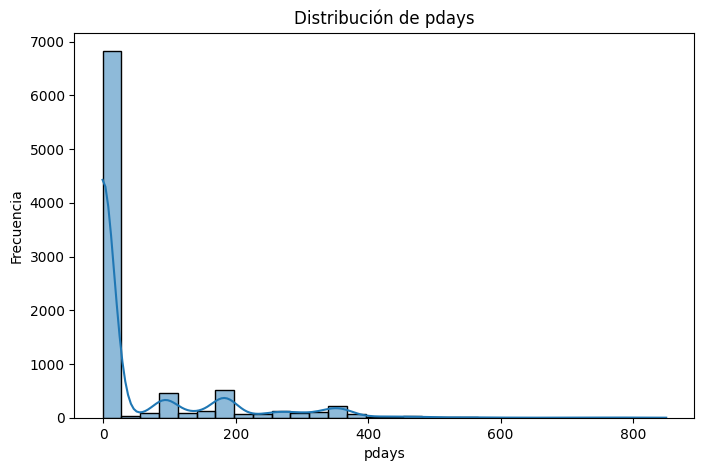

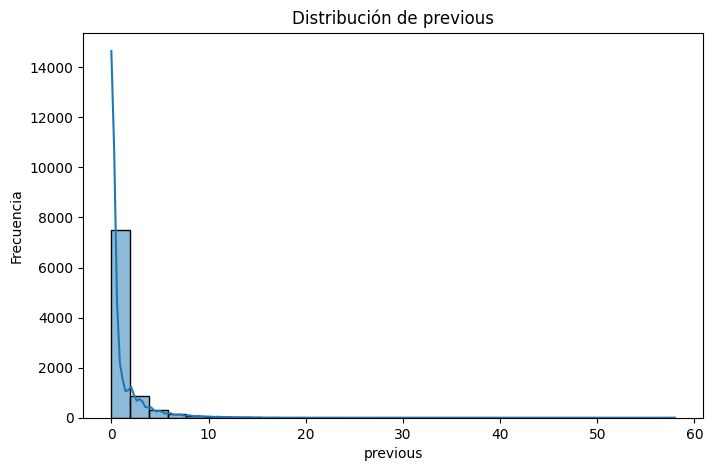

In [5]:
# Obtengo la distribuciòn de las variables numéricas. Dado que ya he aplicado
# el OneHotEncoder, tengo que seleccionar manualmente las varibales numéricas
# del DataFrame

variables_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for variable in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

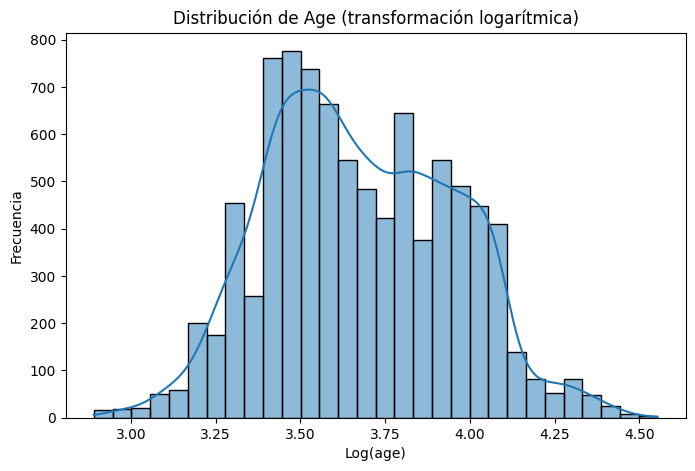

In [6]:
# La variable age es la única que presenta un sesgo, por lo que le aplicaré
# una transformación logarítmica

df['age_log'] = np.log(df['age'])

#Obtengo la visualización de la distribución logarítmica de Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age_log'], bins=30, kde=True)
plt.title('Distribución de Age (transformación logarítmica)')
plt.xlabel('Log(age)')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
#Defino las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['y'])  # Seleccionar todas las columnas excepto la variable objetivo
y = df['y']  # Seleccionar la variable objetivo

# Divido los datos en conjuntos de entrenamiento (60%), validación (20%) y
# prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Muestro las dimensiones de los conjuntos de entrenamiento, validación y
# prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de validación:", X_val.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (5400, 52)
Dimensiones del conjunto de validación: (1800, 52)
Dimensiones del conjunto de prueba: (1800, 52)


In [8]:
# Creo una instancia del modelo de Regresión Logística
modelo_logistico = LogisticRegression(max_iter=10000, random_state=42)

#Entreno el modelo de Regresión Logística con el conjunto de entrenamiento
modelo_logistico.fit(X_train, y_train)

#Estimo las etiquetas del conjunto de validación
predicciones_val = modelo_logistico.predict(X_val)

#Obtengo la presición del modelo en el conjunto de validación
precision_val = accuracy_score(y_val, predicciones_val)

print("Precisión del modelo en el conjunto de validación: ", precision_val)

Precisión del modelo en el conjunto de validación:  0.8294444444444444


Precisión del modelo en el conjunto de validación:  0.8294444444444444


In [9]:
#Defino un rango más amplio de valores de C
parametros_ampliados = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

#Creo una instancia del modelo de Regresión Logística con un número máximo
#de iteraciones aún mayor
modelo_logistico_iter_ampliadas = LogisticRegression(max_iter=10000, random_state=42)

#Creo una instancia de GridSearchCV con el modelo actualizado
grid_search_ampliado_iter_ampliadas = GridSearchCV(estimator=modelo_logistico_iter_ampliadas, param_grid=parametros_ampliados, cv=5, scoring='accuracy', verbose=2)

#Ejecuto la búsqueda en cuadrícula en el conjunto de entrenamiento
grid_search_ampliado_iter_ampliadas.fit(X_train_val, y_train_val)

#Obtengo los mejores hiperparámetros encontrados
mejores_parametros_ampliados_iter_ampliadas = grid_search_ampliado_iter_ampliadas.best_params_
print("Mejores hiperparámetros encontrados:", mejores_parametros_ampliados_iter_ampliadas)

#Obtengo la mejor precisión encontrada
mejor_precision_ampliada_iter_ampliadas = grid_search_ampliado_iter_ampliadas.best_score_
print("Mejor precisión encontrada:", mejor_precision_ampliada_iter_ampliadas)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   3.7s
[CV] END ................................C=0.001, penalty=l2; total time=   2.2s
[CV] END ................................C=0.001, penalty=l2; total time=   1.6s
[CV] END ................................C=0.001, penalty=l2; total time=   1.5s
[CV] END ................................C=0.001, penalty=l2; total time=   1.3s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Mejores hiperparámetros encontrados: {'C': 1000, 'penalty': 'l2'}
Mejor precisión encontrada: 0.8248611111111112


In [ ]:
#Convierto los valores "yes" a 1 y valores "no" a 0
y_train = y_train.replace({'yes': 1, 'no': 0})
y_val = y_val.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

#Defino el modelo de red neuronal
modelo_red_neuronal = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compilo el modelo
modelo_red_neuronal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entreno el modelo
historial_entrenamiento = modelo_red_neuronal.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
169/169 [==============================] - 2s 4ms/step - loss: 4.2476 - accuracy: 0.6567 - val_loss: 2.9320 - val_accuracy: 0.6428
Epoch 2/10
169/169 [==============================] - 1s 3ms/step - loss: 4.5055 - accuracy: 0.6646 - val_loss: 4.3790 - val_accuracy: 0.6550
Epoch 3/10
169/169 [==============================] - 1s 3ms/step - loss: 2.1270 - accuracy: 0.7130 - val_loss: 5.2995 - val_accuracy: 0.5994
Epoch 4/10
169/169 [==============================] - 0s 3ms/step - loss: 2.3277 - accuracy: 0.7043 - val_loss: 1.3784 - val_accuracy: 0.6661
Epoch 5/10
169/169 [==============================] - 1s 3ms/step - loss: 1.7015 - accuracy: 0.7181 - val_loss: 2.7865 - val_accuracy: 0.6100
Epoch 6/10
169/169 [==============================] - 0s 3ms/step - loss: 1.6854 - accuracy: 0.7256 - val_loss: 1.1631 - val_accuracy: 0.6672
Epoch 7/10
169/169 [==============================] - 0s 3ms/step - loss: 2.0409 - accuracy: 0.7193 - val_loss: 2.0918 - val_accuracy: 0.7106
Epoch 

In [ ]:
#Obtengo las predicciones del conjunto de validación
predicciones_val_nn = (modelo_red_neuronal.predict(X_val) > 0.5).astype("int32")

#Calculo la matriz de confusión
matriz_confusion = confusion_matrix(y_val, predicciones_val_nn)

#Imprimo la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)

#Imprimo el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_val, predicciones_val_nn))

57/57 [==============================] - 0s 1ms/step
Matriz de Confusión:
[[971  64]
 [653 112]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.94      0.73      1035
           1       0.64      0.15      0.24       765

    accuracy                           0.60      1800
   macro avg       0.62      0.54      0.48      1800
weighted avg       0.61      0.60      0.52      1800



In [ ]:
# Defino una lista de posibles configuraciones de neuronas por capa y capas
# ocultas
configuraciones = [
    (64,),            # Una capa oculta con 64 neuronas
    (128,),           # Una capa oculta con 128 neuronas
    (64, 32),         # Dos capas ocultas con 64 y 32 neuronas, respectivamente
    (128, 64),        # Dos capas ocultas con 128 y 64 neuronas, respectivamente
    (64, 32, 16),     # Tres capas ocultas con 64, 32 y 16 neuronas, respectivamente
    (128, 64, 32)     # Tres capas ocultas con 128, 64 y 32 neuronas, respectivamente
]

#Entreno y evalúo modelos para cada configuración
resultados = {}
for config in configuraciones:
    # Defino el modelo de red neuronal con la configuración actual
    modelo_red_neuronal = tf.keras.Sequential([
        tf.keras.layers.Dense(neuronas, activation='relu', input_shape=(X_train.shape[1],)) for neuronas in config
    ])
    modelo_red_neuronal.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Capa de salida

    #Compilo el modelo
    modelo_red_neuronal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Entreno el modelo
    modelo_red_neuronal.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    #Evalùo el modelo en el conjunto de validación
    _, precision = modelo_red_neuronal.evaluate(X_val, y_val, verbose=0)

    #Guardo el resultado
    resultados[config] = precision

#Imprimo los resultados
for config, precision in resultados.items():
    print("Configuración:", config, "Precisión en validación:", precision)


Configuración: (64,) Precisión en validación: 0.7833333611488342
Configuración: (128,) Precisión en validación: 0.7588889002799988
Configuración: (64, 32) Precisión en validación: 0.7838888764381409
Configuración: (128, 64) Precisión en validación: 0.7494444251060486
Configuración: (64, 32, 16) Precisión en validación: 0.7155555486679077
Configuración: (128, 64, 32) Precisión en validación: 0.7427777647972107


In [ ]:
#Convierto los valores "yes" a 1 y valores "no" a 0 en el conjunto de entrenamiento y validación
y_train_val_numeric = y_train_val.replace({'yes': 1, 'no': 0})
y_test_numeric = y_test.replace({'yes': 1, 'no': 0})

#Selecciono la mejor configuración
mejor_configuracion = (64, 32, 16)

#Defino el modelo de red neuronal con la mejor configuración
modelo_red_neuronal_final = tf.keras.Sequential([
    tf.keras.layers.Dense(neuronas, activation='relu', input_shape=(X_train.shape[1],)) for neuronas in mejor_configuracion
])
modelo_red_neuronal_final.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Capa de salida

#Compilo el modelo
modelo_red_neuronal_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entreno el modelo en todo el conjunto de entrenamiento
modelo_red_neuronal_final.fit(X_train_val, y_train_val_numeric, epochs=10, batch_size=32, verbose=0)

#Evalúo el modelo en el conjunto de prueba
_, precision_test_nn = modelo_red_neuronal_final.evaluate(X_test, y_test_numeric, verbose=0)

print("Precisión en el conjunto de prueba:", precision_test_nn)


Precisión en el conjunto de prueba: 0.8066666722297668


In [ ]:
#Obtengo las probabilidades del conjunto de prueba
probabilidades_test_rl = modelo_logistico.predict_proba(X_test)[:, 1]

#Convierto las probabilidades en etiquetas de clase (0 o 1) usando un umbral de 0.5
predicciones_test_rl = (probabilidades_test_rl > 0.5).astype("int32")

#Calculo la matriz de confusión
matriz_confusion_rl = confusion_matrix(y_test, predicciones_test_rl)

#Imprimo la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion_rl)

#Imprimo el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones_test_rl))



Matriz de Confusión:
[[901 114]
 [211 574]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1015
           1       0.83      0.73      0.78       785

    accuracy                           0.82      1800
   macro avg       0.82      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800

